# Simple Linear Regression

### Author: Rohit Chawla

### Problem Statement
**Predict the percentage of an student based on the no. of study hours.**

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the data

In [2]:
data_url = 'http://bit.ly/w-data'
hours = pd.read_csv(data_url)
print("Data Imported Successfully")

Data Imported Successfully


In [3]:
hours.head() # first 5 rows of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis

    Hours - Number of hours student is studying
    Scores - Percentage of the student got based on number of hours he/she studied

In [4]:
hours.info() #Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


__There are 25 records with no null values and 2 columns in our data__

In [5]:
hours.describe() #desriptive statistics of data (brief 5 point summary)

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Lets Check if we there is a relation between Hours and percentage of scores

Since both the variables are numeric in nature we can use scatter plot to watch the trend

Text(0.5, 1.0, 'Hours vs Percentage')

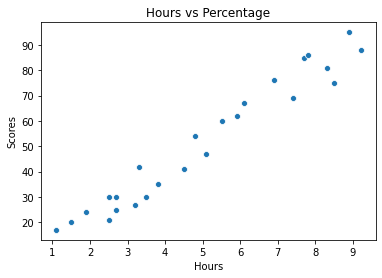

In [6]:
sns.scatterplot(x='Hours',y='Scores',data=hours)
plt.title("Hours vs Percentage")

**As we can clearly see there is the positive linear trend between number of hours studied and percentage of scores**

## Splitting Data to Train and Test

Splitting the Data into train and test is very important to check the accuracy of the model or how well our model predicts the output

**First step is to identify which variables are our indepandent variables (attributes) and which variable is the dependent variable (Response/Labels/Depandent)**

In [7]:
X = hours.drop(['Scores'],axis=1) # Excluding last column (Target Variable)
y = hours['Scores'] # Target variable

**Now that we have our independent and target variable we can split the data using Sklearn's train_test_split() method**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print("Train Data (Independent Variables):",X_train.shape)
print("Test Data (Independent Variables):",X_test.shape)
print("Train Data (Dependent Variable):",y_train.shape)
print("Test Data (Dependent Variable):",y_test.shape)

Train Data (Independent Variables): (20, 1)
Test Data (Independent Variables): (5, 1)
Train Data (Dependent Variable): (20,)
Test Data (Dependent Variable): (5,)


## Training our Model

Since there is the relation between our dependent and target variable linear regression model will suffice to predict the outcome

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train,y_train)

print("Model is trained")

Model is trained


Our model is trained on below equation
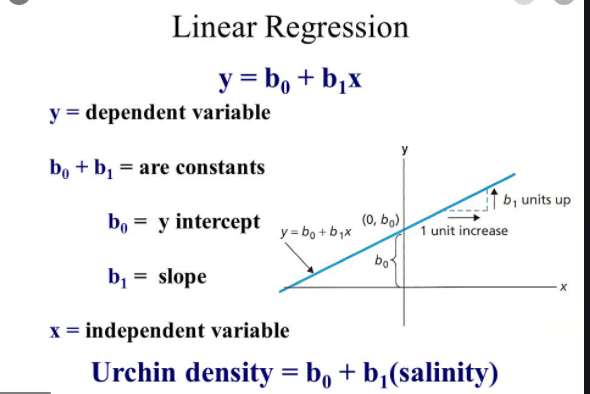

In [10]:
intercept = regressor.intercept_ # bo
slope = regressor.coef_ # b1
print(f"b0 = {intercept}, b1 = {slope}")

b0 = 2.018160041434683, b1 = [9.91065648]


We can check the linearity of the variables as plotting below graph

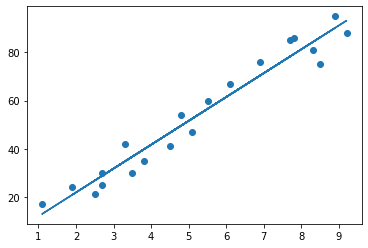

In [11]:
line = intercept + slope*X_train 
plt.scatter(X_train,y_train)
plt.plot(X_train,line)
plt.show()

## Make Predictions using our model

We will feed test sample to our model to get the prediction for the same 

In [12]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [13]:
# Comparing Actual Values vs Predicted Values
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


__As we can see the actual percentages are close to the predicted percentages with some error__

## Evaluating the Model

In [14]:
from sklearn import metrics

In [15]:
metrics.mean_absolute_error(y_test,y_pred)

4.183859899002975

In [16]:
score = regressor.score(X_test,y_test)
print("Accuracy of test data is:",score)

Accuracy of test data is: 0.9454906892105356


__Our model is 94.5% Accurate which is really good and has avg error of 4.18__

Text(0.5, 1.0, 'Actual vs Predicted Scores')

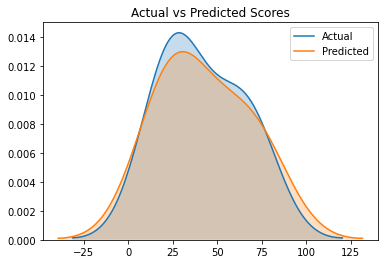

In [17]:
sns.kdeplot(y_test,label='Actual',shade=True)
sns.kdeplot(y_pred,label='Predicted',shade=True)
plt.title("Actual vs Predicted Scores")

__Custom Input__

In [18]:
hours = float(input("Enter the number of hours the student studies to predict his/her score: "))
score = regressor.predict(np.array(hours).reshape(-1,1))
print(f"Predicted Score: {score[0]:.2f}")

Enter the number of hours the student studies to predict his/her score: 9.25
Predicted Score: 93.69
